In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [3]:
# Loading the dataset in python with the name df and displaying first 20 rows: 
df=pd.read_csv("winequality.csv")
df.head(20)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
# Taking sum of all missing values in each column:
df.isna().sum()


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


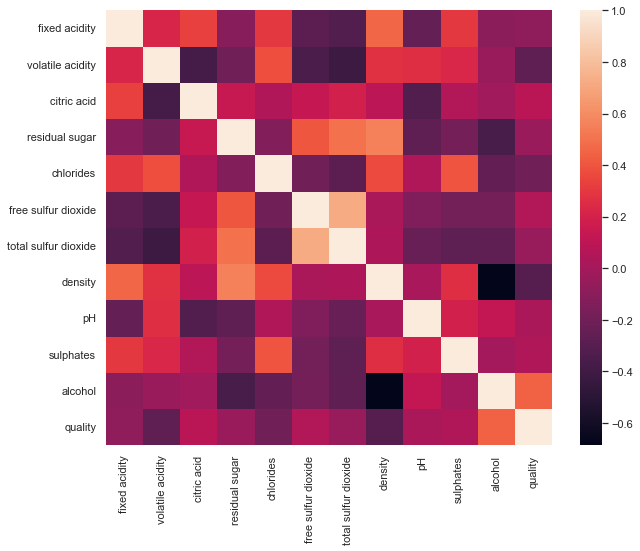

In [9]:
#correlation between all the variables 
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

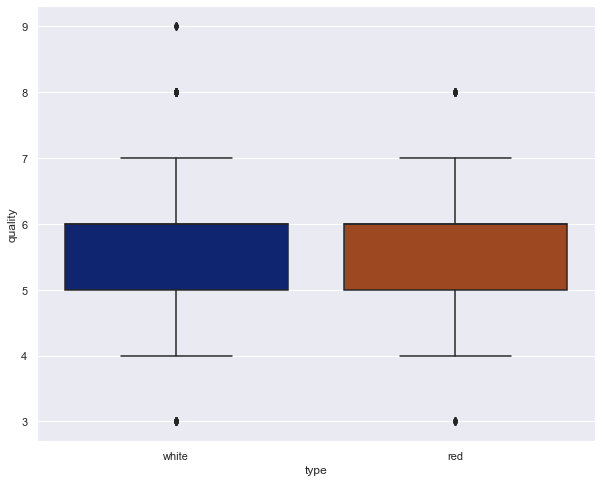

In [10]:
sns.boxplot(x="type",y="quality",data=df, palette="dark")
plt.show()


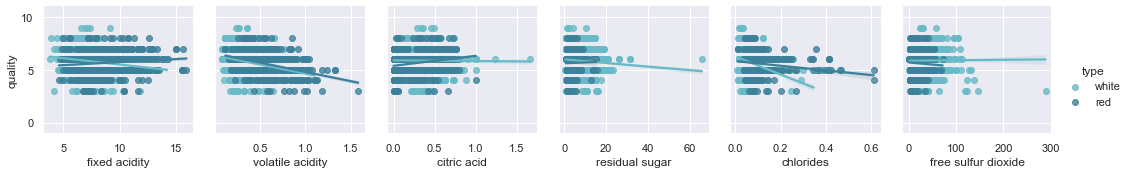

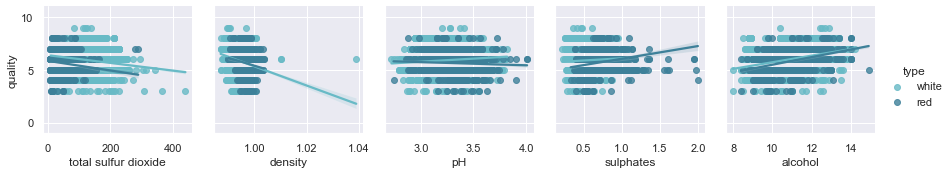

In [11]:
s = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[1:-6],palette="GnBu_d",hue="type")
s.map(sns.regplot)
s.set(ylim=(-1, 11), yticks=[0, 5, 10]);
s.add_legend()
plt.show()

t = sns.PairGrid(df, y_vars=["quality"], x_vars=list(df)[-6:-1],palette="GnBu_d",hue="type")
t.map(sns.regplot)
t.set(ylim=(-1, 11), yticks=[0, 5, 10]);
t.add_legend()
plt.show()

In [13]:
df=df[df.columns.drop('type')]
x=df[df.columns.drop("quality")]
normalized_x=preprocessing.minmax_scale(x)
y=df["quality"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33, random_state=42)


In [15]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression
clf= LinearRegression().fit(X_train,y_train)
clf.score(X_train,y_train)


0.2852550071222294

In [16]:
from sklearn.metrics import mean_squared_error
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print(train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
test_rmse

0.7449819789418427


0.7141299082752783

In [17]:
#Ridge regression
from sklearn.linear_model import RidgeCV
alpha= np.arange(0.01,10,0.1).tolist()
clf = RidgeCV(alphas=alpha).fit(X_train, y_train)
score=clf.score(X_train, y_train)
print("R^2 =", score)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print("train_rmse = ", train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print("test_rmse = ", test_rmse)


R^2 = 0.2851950069950774
train_rmse =  0.7450132474892751
test_rmse =  0.7140757549369641


In [18]:
#Lasso regression
from sklearn.linear_model import LassoCV
alpha= np.arange(0.01,10,0.1).tolist()
clf = LassoCV(alphas=alpha).fit(X_train, y_train)
score=clf.score(X_train, y_train)
print("R^2 =", score)
a=clf.predict(X_train)
train_rmse= (mean_squared_error(a,y_train)) ** 0.5
print("train_rmse = ", train_rmse)
b=clf.predict(X_test)
test_rmse= (mean_squared_error(b,y_test)) ** 0.5
print("test_rmse = ", test_rmse)


R^2 = 0.23422232020682077
train_rmse =  0.7711192740448021
test_rmse =  0.7372391599844503


In [19]:
#K-nearest classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn=KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train,y_train)
g=knn.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")


0.5445221445221445

In [20]:
#Support vector machine classification
from sklearn import svm
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(X_train,y_train)
g=SV.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")


0.5599067599067599

In [21]:
#Naive bayes classification
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
g=nb.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")


0.4428904428904429

In [22]:
#Logistic regression classification
from sklearn.linear_model import LogisticRegression
f=LogisticRegression(max_iter=10000)
f.fit(X_train,y_train)
g=f.predict(X_test)
metrics.accuracy_score(y_test,g)
metrics.f1_score(y_test,g,average="micro")


0.5501165501165501

In [23]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
f= DecisionTreeClassifier()
f.fit(X_train,y_train)
g=f.predict(X_test)
print(metrics.accuracy_score(y_test,g))
print(metrics.f1_score(y_test,g,average="micro"))


0.5846153846153846
0.5846153846153846


In [24]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
f= RandomForestClassifier()
f.fit(X_train, y_train)
g=f.predict(X_test)
print(metrics.accuracy_score(y_test,g))


0.6624708624708625


In [25]:
#Reduction of dataset
def qual(a):
  if 1<=a["quality"]<=3 :
    return "bad wine"
  elif 4<=a["quality"]<=7 :
    return "good wine"
  else :
    return "excellent wine"
df["wine_qual"]=df.apply(qual,axis=1)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_qual
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,good wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,good wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,good wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,good wine


In [26]:
#Classification with reduced dataset
y=df["wine_qual"]
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
f= RandomForestClassifier()
f.fit(X_train, y_train)
g=f.predict(X_test)
print("accuracy for RandomForestClassifier:", metrics.accuracy_score(y_test,g))


accuracy for RandomForestClassifier: 0.9771561771561772


In [27]:
from sklearn import svm
SV=svm.SVC(C=1,kernel='rbf')
SV.fit(X_train,y_train)
g=SV.predict(X_test)
metrics.accuracy_score(y_test,g)
print("accuracy for Support Vector Machines: ", metrics.f1_score(y_test,g,average="micro"))


accuracy for Support Vector Machines:  0.9701631701631701
